In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#print(data.columns)
data=pd.read_csv('/kc_house_data.csv')
print(data.head())
print(data.shape)
#data=data.iloc[0:50,:]

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [ ]:
#checking and dealing with missing values

#data.info()
data.isnull().sum()

#you cam just drop the 2 missing data samples, it wont have much affect on the dataset-> 0=row 1 = column 
data.dropna(axis=0, inplace=True)
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
y = np.asarray(data['price'].values.tolist()) 
data.drop(["price"], axis = 1, inplace = True)
print(type(y))
print(y)

<class 'numpy.ndarray'>
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [ ]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.drop(["id","date","long","lat","view",], axis = 1, inplace = True)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,0,98178,1340,5650
1,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,1991,98125,1690,7639
2,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,0,98028,2720,8062
3,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,0,98136,1360,5000
4,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,0,98074,1800,7503


In [ ]:
x = np.asarray(data.values.tolist())


In [ ]:
#fixing the y dimensions
y=y.reshape(len(y),1)
y.shape
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
print('The shape of the independent features is ',x.shape)
print('The shape of the dependent features is ',y.shape)

The shape of the independent features is  (21611, 15)
The shape of the dependent features is  (21611, 1)


In [ ]:
#add a 1 to the front of both features for X_0
col=np.ones(x.shape[0])
x= np.insert(x,0,col,axis=1)
x.shape
print(x.shape)
#after this x and y are ready for testing, for this example lets just not split the data set and for now just see how it performs 

(21611, 16)


In [ ]:
#splitting into a training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#hypothesis - theta*x array - theta should be row array(x rows,1) and length is the number of features
def h_x(theta,x):
  hx=np.dot(x,theta)
  return hx 

In [ ]:
#cost function - J(theta)
def cost_func(x,y,theta):
  m=y.shape[0]
  h=h_x(theta,x)
  j_theta=(1/(2*m))*np.sum(np.square(h-y))
  return j_theta

In [ ]:
#gradient descent -- how you update the theta -- going to the gloabal minimum

def grad_descent(x,y,theta,learningrate,iterations):
  Jtheta=[]
  m=y.size
  print(m)
  for i in range(iterations):
    hx= h_x(theta,x)
    dtheta=(1/m)*np.dot(x.T,hx-y)
    theta=theta-(learningrate*dtheta)
    Jtheta.append(cost_func(x,y,theta))
  return theta,Jtheta





In [ ]:
#testing the linear regression

theta = np.zeros((x.shape[1], 1))
learningrate=0.000000000160
iterations=63000
theta,Jtheta=grad_descent(x_train,y_train,theta,learningrate,iterations)


17288


learningrate=0.000000000160
iterations=70000

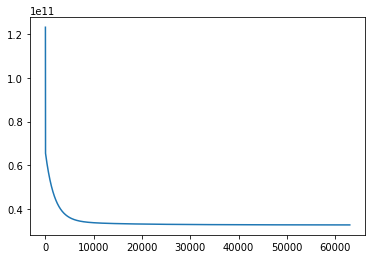

In [ ]:
#plotting the cost function
rng=np.arange(0,iterations)
plt.plot(rng,Jtheta)
plt.show()

In [ ]:
#print(theta)
result=h_x(theta,x_test)
error=(1/x_test.shape[0])*np.sum(np.abs(result-y_test))
#error=((np.abs(result-y))/y)*100
#print(np.average(error))
print(error)

169844.45427158076


In [ ]:
#linear regression using sklearn
import sklearn
from sklearn.linear_model import LinearRegression
train_model= LinearRegression().fit(x_train,y_train)
y_predict=train_model.predict(x_test)

In [ ]:

error=(1/x_test.shape[0])*np.sum(np.abs(y_predict-y_test))
#error=((np.abs(y_predict-y))/y)*100
#print(np.average(error))
print(error)

139887.49104882203
